In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('house-prices.csv')
print('Data shape:', data_df.shape)
data_df.head()

Data shape: (2430, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


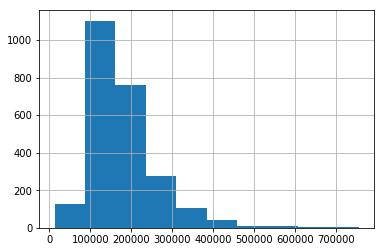

In [3]:
#Plot target variable
data_df['SalePrice'].hist()
plt.show()

### DATA CLEANING

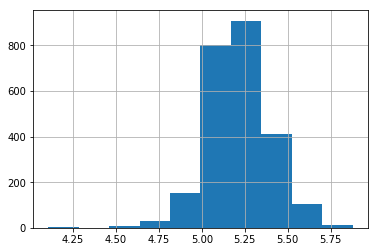

In [4]:

#remove variables with observation identifiers
data_df.drop(['Order', 'PID'], axis=1, inplace=True)

#transform the target variable SalePrice
data_df['LogSalePrice'] = np.log10(data_df['SalePrice'])
data_df.drop(['SalePrice'], axis =1, inplace=True)

data_df['LogSalePrice'].hist()
plt.show()

In [5]:
#check missing values
data_df.isnull().sum()

MS SubClass          0
MS Zoning            0
Lot Frontage       420
Lot Area             0
Street               0
Alley             2267
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        20
Mas Vnr Area        20
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           71
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1186
Garage Type        136
Garage Yr Blt      138
Garage Finish      138
Garage Cars          1
Garage Area          1
Garage Qual

In [6]:
#list of all columns
data_df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [7]:
#check missing values - 2
data_df[['Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath']].isnull().sum()

Bsmt Cond          71
Bsmt Exposure      74
BsmtFin Type 1     71
BsmtFin SF 1        1
BsmtFin Type 2     72
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Heating             0
Heating QC          0
Central Air         0
Electrical          1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
dtype: int64

In [8]:
#Select numerical data
num_data= data_df.select_dtypes(exclude=[object])
print(num_data.shape)
print(num_data.columns)
num_data.head()


(2430, 37)
Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'LogSalePrice'],
      dtype='object')


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,LogSalePrice
0,60,NaN,8795,7,5,2000,2000,0.0,300.0,0.0,...,224,54,0,0,0,0,0,4,2009,5.372912
1,20,75.0,10170,6,6,1951,1951,522.0,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,5.190332
2,160,21.0,2001,4,5,1970,1970,80.0,0.0,0.0,...,0,0,0,0,0,0,0,1,2007,4.875061
3,20,70.0,10552,5,5,1959,1959,0.0,1018.0,0.0,...,0,38,0,0,0,0,0,4,2010,5.218798
4,190,60.0,10120,7,4,1910,1950,0.0,0.0,0.0,...,0,0,264,0,0,0,0,1,2007,5.086360


In [9]:
num_data[['Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area']].head()

,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area
0,652.0,952.0,980,1276,0,2256,0.0,0.0,2,1,4,1,8,1,2000.0,2.0,554.0
1,216.0,216.0,1575,0,0,1575,0.0,0.0,1,1,2,1,5,1,1951.0,2.0,400.0
2,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0
3,380.0,1398.0,1700,0,0,1700,0.0,1.0,1,1,4,1,6,1,1959.0,2.0,447.0
4,925.0,925.0,964,925,0,1889,0.0,0.0,1,1,4,2,9,1,1960.0,1.0,308.0


In [10]:
#Replace missing values

#For ordinal variables I use scale from 0 (for 'No') to 5 (where 'poor' = 1, 'excellent' = 5)

#Replace missing values in column 'Lot Frontage', which is a continous variable, with a mean
data_df['Lot Frontage'].fillna(value=data_df['Lot Frontage'].mean(),inplace=True)

#Replace missing values in column 'Alley' with value 'No' which denotes 'No alley access'
data_df['Alley'].fillna(value="No", inplace=True)
data_df['Alley'].replace({'No': 0, 'Grvl': 1, 'Pave':2}, inplace=True)

#Replace missing values in column 'Mas Vnr Type' with value 'No' which denotes 'None'
data_df['Mas Vnr Type'].fillna(value="None", inplace=True)
data_df['Mas Vnr Type'].replace({'None': 0, 'BrkCmn': 1, 'BrkFace':2, 'CBlock':3, 'Stone':4}, inplace=True)

#Replace missing values in column 'Mas Vnr Area', which is a continous variable, with a mean
data_df['Mas Vnr Area'].fillna(value=data_df['Mas Vnr Area'].mean(), inplace=True)

#In the following columns replace missing values with value No which denotes 'No basement', and replace with integer scale
data_df['Bsmt Qual'].fillna(value='No', inplace=True)
data_df['Bsmt Qual'].replace({'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

data_df['Bsmt Cond'].fillna(value='No', inplace=True)
data_df['Bsmt Cond'].replace({'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)

data_df['Bsmt Exposure'].fillna(value ='NoB', inplace=True)
data_df['Bsmt Exposure'].replace({'NoB': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},inplace=True)

data_df['BsmtFin Type 1'].fillna(value='No', inplace=True)
data_df['BsmtFin Type 1'].replace({'No': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},inplace=True)

data_df['BsmtFin Type 2'].fillna(value='No', inplace=True)
data_df['BsmtFin Type 2'].replace({'No': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},inplace=True)


#Replace missing values in following columns, which are continous variables, with a mean
data_df['BsmtFin SF 1'].fillna(value=data_df['BsmtFin SF 1'].mean(), inplace=True)
data_df['BsmtFin SF 2'].fillna(value=data_df['BsmtFin SF 2'].mean(), inplace=True)
data_df['Bsmt Unf SF'].fillna(value=data_df['Bsmt Unf SF'].mean(), inplace=True)
data_df['Total Bsmt SF'].fillna(value=data_df['Total Bsmt SF'].mean(), inplace=True)


#Replace missing values in column 'Electrical' with values 'No' and use scale from 0 (for 'No') to 5 (where poor = 1, excellent = 5)

data_df['Electrical'].fillna(value='No', inplace=True)
data_df['Electrical'].replace({'No': 0, 'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},inplace=True)

# Replace missing values in columns 'Bsmt Full Bath' and 'Bsmt Half Bath' with a '0' which is most common value 
data_df['Bsmt Full Bath'].fillna(value = 'No', inplace=True)
data_df['Bsmt Full Bath'].replace({'No':0}, inplace=True)

data_df['Bsmt Half Bath'].fillna(value = 'No', inplace=True)
data_df['Bsmt Half Bath'].replace({'No':0}, inplace=True)


# For the following columns replaced missing values with value No which denotes 'No fireplace/Garage', 
# and replace with integer scale
data_df['Fireplace Qu'].fillna(value = 'No', inplace=True)
data_df['Fireplace Qu'].replace({'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)

data_df['Garage Type'].fillna(value='No', inplace=True)
data_df['Garage Type'].replace({'No': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6},inplace=True)


#Replace with median 
data_df['No Garage'] = data_df['Garage Yr Blt'].isnull().astype(int)
data_df['Garage Yr Blt'].fillna(data_df['Garage Yr Blt'].median(), inplace =True)


# Replaced missing values with value No which denotes 'No Garage', 
# and replace with integer scale from 0 (for 'No') to 5 (where poor = 1, excellent = 5)
data_df['Garage Finish'].fillna(value='No', inplace=True)
data_df['Garage Finish'].replace({'No': 0, 'Unf':1, 'RFn': 2, 'Fin':3}, inplace=True)


# Replaced missing values with MEDIAN
data_df['Garage Cars'].fillna(data_df['Garage Cars'].median(), inplace =True)
data_df['Garage Area'].fillna(data_df['Garage Area'].median(), inplace =True)


# Replaced missing values with value No, 
# and replace with integer scale from 0 (for 'No') to 5 (where poor = 1, excellent = 5)
data_df['Garage Qual'].fillna(value='No', inplace=True)
data_df['Garage Qual'].replace({'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

data_df['Garage Cond'].fillna(value='No', inplace=True)
data_df['Garage Cond'].replace({'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)


# For the following columns replaced missing values with value No which denotes 'No Pool/Fence/Misc features', 
# and replace with integer scale from 0 (for 'No') to 5 (where poor = 1, excellent = 5)

data_df['Pool QC'].fillna(value='No', inplace =True)
data_df['Pool QC'].replace({'No': 0, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)

data_df['Fence'].fillna(value='No', inplace=True)
data_df['Fence'].replace({'No': 0, 'MnWw': 1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}, inplace=True)

data_df['Misc Feature'].fillna(value='No', inplace=True)
data_df['Misc Feature'].replace({'No':0, 'TenC':1, 'Shed':2, 'Othr':3, 'Gar2': 4, 'Elev':5},inplace=True)

print('Null values in data set:', data_df.isnull().sum().sum())
print('Data set shape', data_df.shape)

Null values in data set: 0
Data set shape (2430, 81)


In [11]:
#check numerical columns
num_data1 = data_df.select_dtypes(exclude=[object])
print(num_data1.shape)
num_data1.head()

(2430, 54)


,MS SubClass,Lot Frontage,Lot Area,Alley,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,LogSalePrice,No Garage
0,60,69.20199,8795,0,7,5,2000,2000,0,0.0,...,0,0,0,0,0,0,4,2009,5.372912,0
1,20,75.00000,10170,0,6,6,1951,1951,2,522.0,...,0,0,0,0,0,0,6,2006,5.190332,0
2,160,21.00000,2001,0,4,5,1970,1970,2,80.0,...,0,0,0,0,0,0,1,2007,4.875061,0
3,20,70.00000,10552,0,5,5,1959,1959,0,0.0,...,0,0,0,0,0,0,4,2010,5.218798,0
4,190,60.00000,10120,0,7,4,1910,1950,0,0.0,...,0,0,0,3,0,0,1,2007,5.086360,0


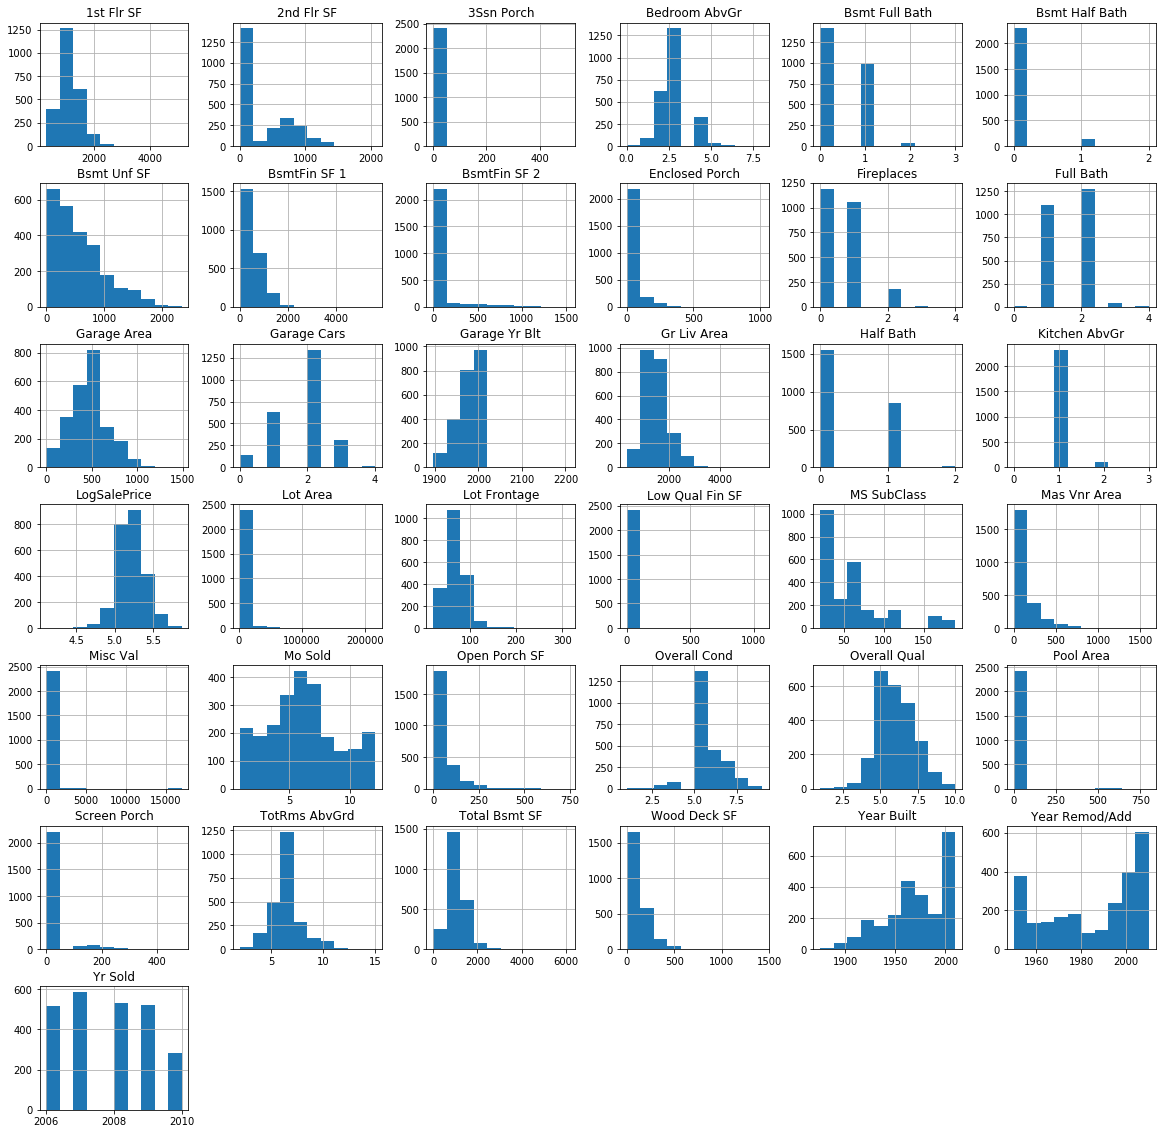

In [12]:
# look for outliers

num_data.hist(figsize = (20,20))
plt.show()

#It seems that 'Garage Year built' feature has visible outliers

Number of outliers Garage Yr Blt : 1


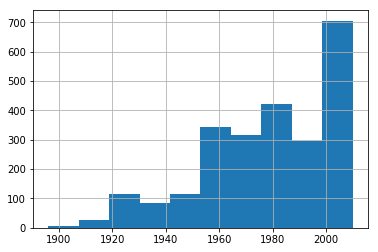

In [13]:
#Find outliers for Garage Yr Blt variable
z_Garage_Yr_blt = (data_df['Garage Yr Blt'] - data_df['Garage Yr Blt'].mean())/data_df['Garage Yr Blt'].std()
print('Number of outliers Garage Yr Blt :',(z_Garage_Yr_blt > 3).sum())

#remove outliers 
data_df = data_df[z_Garage_Yr_blt < 3]
data_df.shape

#check for 'Garage Yr Blt' variable
data_df['Garage Yr Blt'].hist()
plt.show()

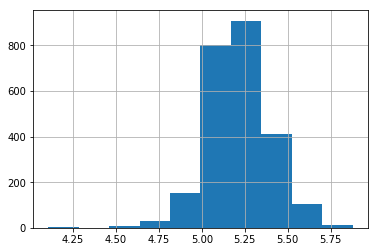

(2429, 81)

In [14]:
# check outliers in target variable 
data_df['LogSalePrice'].hist()
plt.show()
data_df.shape

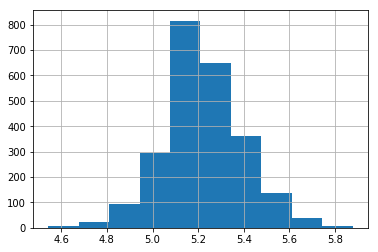

(2427, 81)

In [15]:
#It looks like there are  some outliers in 'LogSalePrice', remove it

data_df = data_df[data_df['LogSalePrice'] > 4.3]
data_df ['LogSalePrice'].hist()
plt.show()
data_df.shape

### ENCODING, FEATURE ENGINEERING

In [16]:
#Define numerical encoding to Ordinal variables
#idea is to code variables from 1 to 5 following principle bad-good-better, where 1 is poor or not so good and 5 is excellent

data_df['Lot Shape'].replace({'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}, inplace=True)
data_df['Utilities'].replace({'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}, inplace=True)
data_df['Land Slope'].replace({'Sev': 1, 'Mod': 2, 'Gtl': 3}, inplace = True)
data_df['Exter Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
data_df['Exter Cond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
data_df['Heating QC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
data_df['Kitchen Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
data_df['Functional'].replace({'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}, inplace=True)
data_df['Paved Drive'].replace({'N': 0, 'P': 1, 'Y': 2}, inplace=True)


In [17]:
#'Year Built','Year Remod/Add', 'Garage Yr Blt' features

print(data_df['Year Built'].min(), data_df['Year Built'].max())
print(data_df['Year Remod/Add'].min(), data_df['Year Remod/Add'].max())
print(data_df['Garage Yr Blt'].min(), data_df['Garage Yr Blt'].max())

#create 10 bins and encode them from 0 (old) and 9 (new). Period from 1875 to 2010
data_df['House Modernity'] = pd.qcut(data_df['Year Built'], q=10).cat.codes

#create 6 bins and encode them from 0 (long time ago) and 5 (recently). Period from 1950 to 2010 
#(1 bin/10 years)
data_df['House Remod/Add Modernity'] = pd.qcut(data_df['Year Remod/Add'], q=6).cat.codes

#create 10 bins and encode them from 0 (old) and 9 (new). Period from 1875 to 2010
data_df['Garage Modernity'] = pd.qcut(data_df['Garage Yr Blt'], q=10).cat.codes


data_df.shape

1875 2010
1950 2010
1896.0 2010.0


(2427, 84)

In [18]:
#feature engineering
#continious variables

#check numerical variables
num_data.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'LogSalePrice'],
      dtype='object')

In [19]:
#create variable for total surface (will be used in a Simple model)
data_df['Total_surface'] = data_df['Total Bsmt SF'] + data_df['Gr Liv Area']
data_df['Total_surface'].head()

0    3208.0
1    1791.0
2    1638.0
3    3098.0
4    2814.0
Name: Total_surface, dtype: float64

In [20]:
#remove features which are linear combinations of various variables ('Total Bsmt SF', 'Gr Liv Area')
#and original features  ('Garage Yr Blt', 'Year Built', 'Year Remod/Add')
data_df = data_df.drop(['Garage Yr Blt', 'Year Built', 'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area'], axis=1)
data_df.shape


(2427, 80)

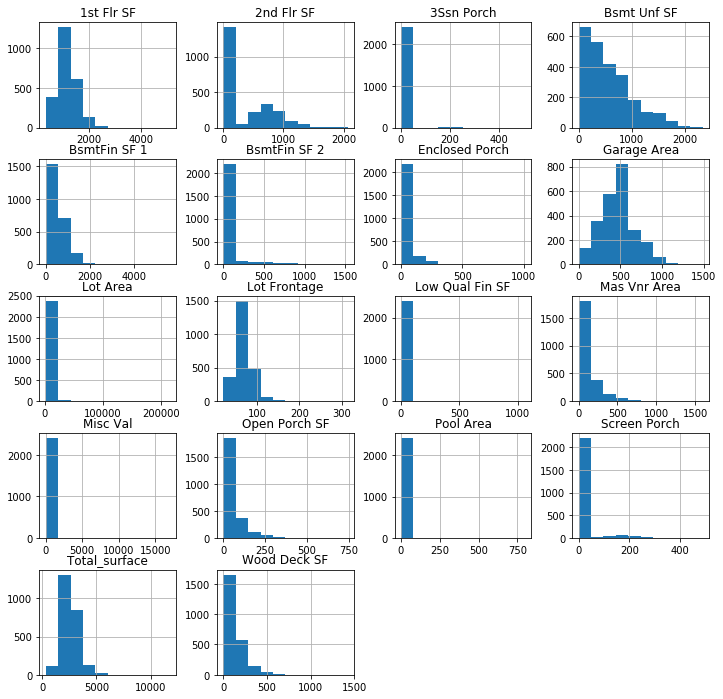

In [21]:
#select continious variables

contin_features = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 
       'BsmtFin SF 1',  'BsmtFin SF 2', 'Bsmt Unf SF',  '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF',   'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Total_surface']

#plot them to see how they are distributed
data_df[contin_features].hist(figsize= (12,12))
plt.show()

#we can see that mostly of them are with skewed distributions


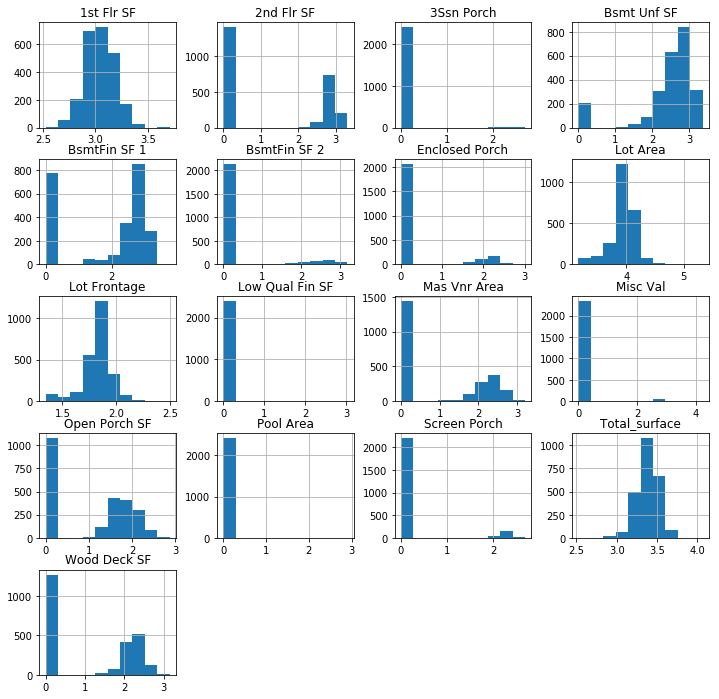

In [22]:
#Apply logarithm transformation to all of them except 'Garage Area' variable which is not skewed and looks like more normally distributed

contin_features2 = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 
       'BsmtFin SF 1',  'BsmtFin SF 2', 'Bsmt Unf SF',  '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Total_surface']

data_df[contin_features2] = np.log10(data_df[contin_features2]+1)

data_df[contin_features2].hist(figsize= (12,12))
plt.show()

In [23]:
#Add polynomial features for 'Garage Area' variable

# Scaling 
data_df['Garage Area'] = (data_df['Garage Area'] - data_df['Garage Area'].min()) / (data_df['Garage Area'].max() - data_df['Garage Area'].min())
data_df['Garage Area'].head()


# Add polynomial features 

data_df['Garage Area**2'] = data_df['Garage Area']**2

data_df[['Garage Area', 'Garage Area**2']].head()

,Garage Area,Garage Area**2
0,0.372312,0.138616
1,0.268817,0.072263
2,0.192204,0.036942
3,0.300403,0.090242
4,0.206989,0.042845


### MODEL CREATION

###### Simple Model

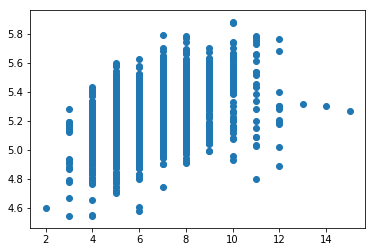

In [24]:
#For Simple Model two features are choosen: 'TotRms AbvGrd' and 'Lot Area'

#plot data before fitting a model 
plt.scatter(data_df['TotRms AbvGrd'], data_df['LogSalePrice'])
plt.show()

In [25]:
#filter outliers

filter =(data_df['TotRms AbvGrd']>12)
data_df = data_df[~filter]
data_df.shape

(2424, 81)

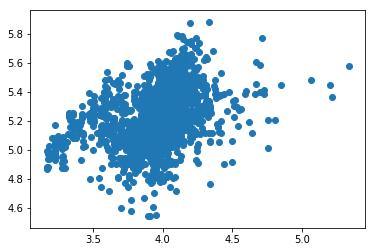

In [26]:
plt.scatter(data_df['Lot Area'], data_df['LogSalePrice'])
plt.show()

In [27]:
#filter outliers
filter1 = data_df['Lot Area'] < 5.0
data_df = data_df[filter1]
data_df.shape

(2420, 81)

In [28]:
# Fitting model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error as mse

def MAE(y, y_pred):
    return np.mean(np.abs(10**y - 10**y_pred))


In [29]:
#Simple Model

X_simple = data_df[['Lot Area', 'TotRms AbvGrd']].values
y_simple = data_df['LogSalePrice'].values

print('X_shape, y_shape:', X_simple.shape, y_simple.shape)

#Split the data 
X_tr_simple, X_te_simple, y_tr_simple, y_te_simple = train_test_split(X_simple, y_simple, train_size=0.5, test_size=0.5, random_state=0)


#Linear regression
lr = LinearRegression()
lr.fit(X_tr_simple, y_tr_simple)

#Prediction on test set and train set
y_pred_simple_lr_te = lr.predict(X_te_simple)
y_pred_simple_lr_tr = lr.predict(X_tr_simple)


#Evaluation
#MAE
simple_mae_lr_te = MAE(y_te_simple, y_pred_simple_lr_te)
print ('simple mae_lr_te:{:.2f}'.format(simple_mae_lr_te))

simple_mae_lr_tr = MAE(y_tr_simple, y_pred_simple_lr_tr)
print ('simple mae_lr_tr:{:.2f}'.format(simple_mae_lr_tr))

#RMSLE
simple_RMSLE_lr_te = np.sqrt(mse(y_te_simple, y_pred_simple_lr_te))
print('simple RMSLE_lr_te:{:.2f}'.format(simple_RMSLE_lr_te))

simple_RMSLE_lr_tr = np.sqrt(mse(y_tr_simple, y_pred_simple_lr_tr))
print('simple RMSLE_lr_tr:{:.2f}'.format(simple_RMSLE_lr_tr))



#Huber Loss
huber = HuberRegressor()
huber.fit(X_tr_simple, y_tr_simple)
y_pred_simple_hub_te = huber.predict(X_te_simple)
y_pred_simple_hub_tr = huber.predict(X_tr_simple)


#Evaluation
#MAE
simple_mae_hub_te = MAE(y_te_simple, y_pred_simple_hub_te)
print ('simple mae_hub_test:{:.0f}'.format(simple_mae_hub_te))

simple_mae_hub_tr = MAE(y_te_simple, y_pred_simple_hub_te)
print ('simple mae_hub_train:{:.0f}'.format(simple_mae_hub_tr))

#RMSLE
simple_RMSLE_hub_te = np.sqrt(mse(y_te_simple, y_pred_simple_hub_te))
print('simple RMSLE_hub_te:{:.2f}'.format(simple_RMSLE_hub_te))

simple_RMSLE_hub_tr = np.sqrt(mse(y_tr_simple, y_pred_simple_hub_tr))
print('simple RMSLE_hub_tr:{:.2f}'.format(simple_RMSLE_hub_tr))

#It seems that MAE is too high, close to baseline (see below Evaluation part)


X_shape, y_shape: (2420, 2) (2420,)
simple mae_lr_te:46752.15
simple mae_lr_tr:46919.13
simple RMSLE_lr_te:0.15
simple RMSLE_lr_tr:0.15
simple mae_hub_test:46560
simple mae_hub_train:46560
simple RMSLE_hub_te:0.15
simple RMSLE_hub_tr:0.15


In [30]:
#Try another Simple model with variables 'Total_surface' and 'Sale Condition'

df_simple = data_df[['Total_surface', 'Sale Condition', 'LogSalePrice']]
df_simple.head()

,Total_surface,Sale Condition,LogSalePrice
0,3.506370,Normal,5.372912
1,3.253338,Normal,5.190332
2,3.214579,Normal,4.875061
3,3.491222,Normal,5.218798
4,3.449478,Normal,5.086360


In [31]:
#One-hot encoding for 'Sale Condition' variable

encoded_simple = pd.get_dummies(df_simple, columns=['Sale Condition'])
print(encoded_simple.shape)

encoded_simple.head()


(2420, 8)


,Total_surface,LogSalePrice,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.506370,5.372912,0,0,0,0,1,0
1,3.253338,5.190332,0,0,0,0,1,0
2,3.214579,4.875061,0,0,0,0,1,0
3,3.491222,5.218798,0,0,0,0,1,0
4,3.449478,5.086360,0,0,0,0,1,0


In [32]:
#Fitting Simple Model-2

X_simple2 = encoded_simple.drop(['LogSalePrice'], axis=1).values
y_simple2 = encoded_simple['LogSalePrice'].values

print('X_shape, y_shape:', X_simple2.shape, y_simple2.shape)

#Split the data 
X_tr_simple2, X_te_simple2, y_tr_simple2, y_te_simple2 = train_test_split(X_simple2, y_simple2, train_size=0.5, test_size=0.5, random_state=0)

#Linear regression
lr = LinearRegression()
lr.fit(X_tr_simple2, y_tr_simple2)

#Prediction on test set and train set
y_pred_simple_lr_te2 = lr.predict(X_te_simple2)
y_pred_simple_lr_tr2 = lr.predict(X_tr_simple2)


#Evaluation
#MAE
simple_mae_lr_te2 = MAE(y_te_simple2, y_pred_simple_lr_te2)
print ('simple mae_lr_te2:{:.0f}'.format(simple_mae_lr_te2))

simple_mae_lr_tr2 = MAE(y_tr_simple2, y_pred_simple_lr_tr2)
print ('simple mae_lr_tr2:{:.0f}'.format(simple_mae_lr_tr2))

#RMSLE
simple_RMSLE_lr_te2 = np.sqrt(mse(y_te_simple2, y_pred_simple_lr_te2))
print('simple RMSLE_lr_te2:{:.2f}'.format(simple_RMSLE_lr_te2))

simple_RMSLE_lr_tr2 = np.sqrt(mse(y_tr_simple2, y_pred_simple_lr_tr2))
print('simple RMSLE_lr_tr2:{:.2f}'.format(simple_RMSLE_lr_tr2))



#Huber Loss
huber.fit(X_tr_simple2, y_tr_simple2)
y_pred_simple_hub_te2 = huber.predict(X_te_simple2)
y_pred_simple_hub_tr2 = huber.predict(X_tr_simple2)


#Evaluation
#MAE
simple_mae_hub_te2 = MAE(y_te_simple2, y_pred_simple_hub_te2)
print ('simple mae_hub_test2:{:.0f}'.format(simple_mae_hub_te2))

simple_mae_hub_tr2 = MAE(y_te_simple2, y_pred_simple_hub_te2)
print ('simple mae_hub_train2:{:.0f}'.format(simple_mae_hub_tr2))

#RMSLE
simple_RMSLE_hub_te2 = np.sqrt(mse(y_te_simple2, y_pred_simple_hub_te2))
print('simple RMSLE_hub_te2:{:.2f}'.format(simple_RMSLE_hub_te2))

simple_RMSLE_hub_tr2 = np.sqrt(mse(y_tr_simple2, y_pred_simple_hub_tr2))
print('simple RMSLE_hub_tr2:{:.2f}'.format(simple_RMSLE_hub_tr2))


#In this model MAE is much better, the best one here is the Huber one

X_shape, y_shape: (2420, 7) (2420,)
simple mae_lr_te2:30246
simple mae_lr_tr2:30621
simple RMSLE_lr_te2:0.10
simple RMSLE_lr_tr2:0.10
simple mae_hub_test2:29871
simple mae_hub_train2:29871
simple RMSLE_hub_te2:0.10
simple RMSLE_hub_tr2:0.10


##### Intermediate model

In [33]:
# Variables to fit the model
int_data_df = data_df[['Lot Area', 'Utilities', 'Neighborhood', 'Overall Qual', 'House Modernity',  'Heating', 
                 'Central Air', 'Electrical', 'Kitchen Qual', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 
            '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'TotRms AbvGrd', 'Garage Type', 'Garage Cars',  'Fence', 'LogSalePrice']]

#one hot encoding
encoded_int_df = pd.get_dummies(int_data_df, columns=['Utilities', 'Neighborhood', 'Overall Qual', 'House Modernity', 'Heating', 
                                              'Central Air',  'Electrical',  'Kitchen Qual', 'Garage Type', 
                                              'Fence']) 

encoded_int_df.head()

,Lot Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,TotRms AbvGrd,Garage Cars,LogSalePrice,...,Garage Type_2,Garage Type_3,Garage Type_4,Garage Type_5,Garage Type_6,Fence_0,Fence_1,Fence_2,Fence_3,Fence_4
0,3.944285,2.478566,0.0,2.814913,2.991669,3.106191,0.0,8,2.0,5.372912,...,0,1,0,0,0,1,0,0,0,0
1,4.007364,0.000000,0.0,2.336460,3.197556,0.000000,0.0,5,2.0,5.190332,...,0,0,0,1,0,1,0,0,0,0
2,3.301464,0.000000,0.0,2.737987,2.737987,2.737987,0.0,6,1.0,4.875061,...,0,0,0,1,0,1,0,0,0,0
3,4.023376,3.008174,0.0,2.580925,3.230704,0.000000,0.0,6,2.0,5.218798,...,0,0,0,1,0,1,0,0,0,0
4,4.005223,0.000000,0.0,2.966611,2.984527,2.966611,0.0,9,1.0,5.086360,...,0,0,0,0,0,0,0,0,1,0


In [34]:

X_int = encoded_int_df.drop(['LogSalePrice'], axis=1).values
y_int = encoded_int_df['LogSalePrice'].values


#Split the data 
X_tr_int, X_te_int, y_tr_int, y_te_int = train_test_split(X_int, y_int, train_size = 0.5, test_size=0.5, random_state=0)

#Linear Regression
lr.fit(X_tr_int, y_tr_int)

y_int_te_pred = lr.predict(X_te_int)
y_int_tr_pred = lr.predict(X_tr_int)


#Evaluation of the intermediate model

#MAE intermediate model
int_mae_test = MAE(y_te_int, y_int_te_pred)
print('Intermediate model MAE test:{:.0f}'.format(int_mae_test))

int_mae_train = MAE(y_tr_int, y_int_tr_pred)
print('Intermediate model MAE train:{:.0f}'.format(int_mae_train))


#RMSLE intermediate model
int_RMSLE_lr_te = np.sqrt(mse(y_te_int, y_int_te_pred))
print('Intermediate model RMSLE test:{:.2f}'.format(int_RMSLE_lr_te))

int_RMSLE_lr_tr = np.sqrt(mse(y_tr_int, y_int_tr_pred))
print ('Intermediate model RMSLE train:{:.2f}'.format(int_RMSLE_lr_tr))

#There is a big difference between test and train RMSLE as well as MAE which is a sign of overfitting

Intermediate model MAE test:inf
Intermediate model MAE train:16802
Intermediate model RMSLE test:1097142117.05
Intermediate model RMSLE train:0.06


C:\Users\User1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys


In [35]:
#Regularization

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_tr_int, y_tr_int)

y_ridge_te = ridge.predict(X_te_int)
y_ridge_tr = ridge.predict(X_tr_int)


#Evaluation regularized intermediate model
#MAE
int_mae_ridge_test = MAE(y_te_int, y_ridge_te)
print('Intermediate model MAE ridge test:{:.0f}'.format(int_mae_ridge_test))

int_mae_ridge_train = MAE(y_tr_int, y_ridge_tr)
print('Intermediate model MAE ridge train:{:.0f}'.format(int_mae_ridge_train))

#RMSLE
int_RMSLE_ridge_te = np.sqrt(mse(y_tr_int, y_ridge_te))
print('Intermediate model RMSLE ridge test:{:.2f}'.format(int_RMSLE_ridge_te))

int_RMSLE_ridge_tr = np.sqrt(mse(y_te_int, y_ridge_tr))
print('Intermediate model RMSLE ridge train:{:.2f}'.format(int_RMSLE_ridge_tr))

Intermediate model MAE ridge test:16693
Intermediate model MAE ridge train:16985
Intermediate model RMSLE ridge test:0.24
Intermediate model RMSLE ridge train:0.24


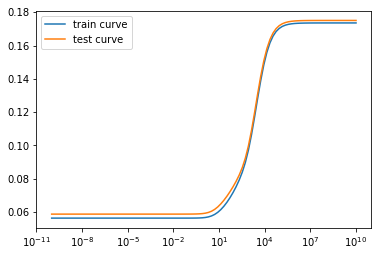

In [36]:
#Tune Ridge regression
from sklearn.metrics import mean_squared_error as mse

alphas = np.logspace(-10, 10, num=100)
train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha)
    ridge.fit(X_tr_int, y_tr_int)
    
    y_pred_tr = ridge.predict(X_tr_int)
    train_rmse = np.sqrt(mse(y_tr_int, y_pred_tr))
    train_scores.append(train_rmse)
    
    y_pred_te = ridge.predict(X_te_int)
    test_rmse = np.sqrt(mse(y_te_int, y_pred_te))
    test_scores.append(test_rmse)

  
plt.semilogx(alphas, train_scores, label = 'train curve')
plt.semilogx(alphas, test_scores, label = 'test curve')
plt.legend()
plt.show()

In [37]:
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
best_score = test_scores[idx]

print('Best alpha value {:.1e} with score {:.3f}'.format(best_alpha, best_score))


Best alpha value 2.5e-10 with score 0.059


In [38]:
#Ridge regression with tuned alpha
ridge2 = Ridge(best_alpha)
ridge2.fit(X_tr_int, y_tr_int)

y_pred_ridge2_te = ridge2.predict(X_te_int)
y_pred_ridge2_tr = ridge2.predict(X_tr_int)


#Evaluation
#MAE
int_mae_tuned_te = MAE(y_pred_ridge2_te, y_te_int)
print('Intermediate model MAE tuned ridge test:{:.0f}'.format(int_mae_tuned_te))

int_mae_tuned_tr = MAE(y_pred_ridge2_tr, y_tr_int)
print('Intermediate model MAE tuned ridge train:{:.0f}'.format(int_mae_tuned_tr))

#RMSLE
int_RMSLE_tuned_te = np.sqrt(mse(y_pred_ridge2_te, y_te_int))
print('Intermediate model RMSLE tuned ridge test:{:.2f}'.format(int_RMSLE_tuned_te))

int_RMSLE_tuned_tr = np.sqrt(mse(y_pred_ridge2_tr, y_tr_int))
print('Intermediate model RMSLE tuned ridge train:{:.2f}'.format(int_RMSLE_tuned_tr))

Intermediate model MAE tuned ridge test:16509
Intermediate model MAE tuned ridge train:16802
Intermediate model RMSLE tuned ridge test:0.06
Intermediate model RMSLE tuned ridge train:0.06


#####  Complex model

In [39]:
print(data_df.shape)
data_df.columns

(2420, 81)


Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck 

In [40]:
# variables to fit the model. Remove 'Total_surface as a sum of 'Total Bsmt' and 'Abv Gr'
compl_data_df = data_df.drop(['Total_surface'], axis=1)
print(compl_data_df.shape)
compl_data_df.columns

(2420, 80)


Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck 

In [41]:
#one hot encoding
encoded_compl_df = pd.get_dummies(compl_data_df, columns=['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 
 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
'Mas Vnr Type','Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition', 'No Garage', 
'Garage Modernity', 'House Modernity', 'House Remod/Add Modernity',  
                                           
'Lot Shape', 'Utilities',  'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual',
  'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 
  'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
                                          
    'Mo Sold', 'Yr Sold']) 


encoded_compl_df.head()


,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,...,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Yr Sold_2006,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
0,1.846349,3.944285,0.000000,2.478566,0.0,2.814913,2.991669,3.106191,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,1.880814,4.007364,2.718502,0.000000,0.0,2.336460,3.197556,0.000000,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,1.342423,3.301464,1.908485,0.000000,0.0,2.737987,2.737987,2.737987,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,1.851258,4.023376,0.000000,3.008174,0.0,2.580925,3.230704,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,1.785330,4.005223,0.000000,0.000000,0.0,2.966611,2.984527,2.966611,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [42]:

X_compl = encoded_compl_df.drop(['LogSalePrice'], axis=1).values
y_compl = encoded_compl_df['LogSalePrice'].values


#Split the data 
X_tr_compl, X_te_compl, y_tr_compl, y_te_compl = train_test_split(X_compl, y_compl, train_size = 0.5, test_size=0.5, random_state=0)


lr.fit(X_tr_compl, y_tr_compl)

y_compl_lr_te = lr.predict(X_te_compl)
y_compl_lr_tr = lr.predict(X_tr_compl)

#Evaluation
#MAE
compl_mae_test_lr = MAE(y_te_compl, y_compl_lr_te)
print('Complex model MAE test:{:.0f}'.format(compl_mae_test_lr))

mae_train_c = MAE(y_tr_compl, y_compl_lr_tr)
print('Complex model MAE train:{:.0f}'.format(mae_train_c))


#RMSLE
compl_RMSLE_lr_te = np.sqrt(mse(y_te_compl, y_compl_lr_te))
print('Complex model RMSLE test:{:.2f}'.format(compl_RMSLE_lr_te))

compl_RMSLE_lr_tr = np.sqrt(mse(y_tr_compl, y_compl_lr_tr))
print ('Complex model RMSLE train:{:.0f}'.format(compl_RMSLE_lr_tr))

#There is a big difference between test and train RMSLE as well as MAE which is a sign of overfitting

Complex model MAE test:inf
Complex model MAE train:10682
Complex model RMSLE test:1323449094.58
Complex model RMSLE train:0


C:\Users\User1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys


In [43]:
#Regularization

ridge = Ridge()
ridge.fit(X_tr_compl, y_tr_compl)

y_ridge_te_c = ridge.predict(X_te_compl)

y_ridge_tr_c = ridge.predict(X_tr_compl)

compl_mae_ridge_test = MAE(y_te_compl, y_ridge_te_c)
print('Complex model MAE ridge test:{:.0f}'.format(compl_mae_ridge_test ))

compl_mae_ridge_train = MAE(y_tr_compl, y_ridge_tr_c)
print('Complex model MAE ridge train:{:.0f}'.format(compl_mae_ridge_train))

compl_RMSLE_te = np.sqrt(mse(y_tr_compl, y_ridge_te_c))
print('Complex model RMSLE test:{:.2f}'.format(compl_RMSLE_te))

compl_RMSLE_tr = np.sqrt(mse(y_te_compl, y_ridge_tr_c))
print('Complex model RMSLE train:{:.2f}'.format(compl_RMSLE_tr))

Complex model MAE ridge test:15149
Complex model MAE ridge train:11523
Complex model RMSLE test:0.24
Complex model RMSLE train:0.24


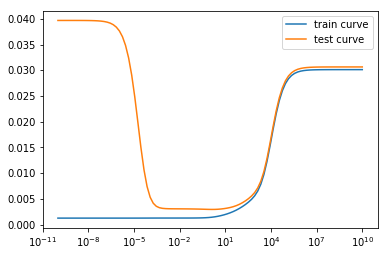

In [44]:
#Tune Ridge regression
from sklearn.metrics import mean_squared_error as mse

alphas = np.logspace(-10, 10, num=100)
train_scores_c = []
test_scores_c = []

for alpha in alphas:
    ridge_c = Ridge(alpha)
    ridge_c.fit(X_tr_compl, y_tr_compl)
    
    y_pred_tr_c = ridge_c.predict(X_tr_compl)
    train_mse_c = mse(y_tr_compl, y_pred_tr_c)
    train_scores_c.append(train_mse_c)
    
    y_pred_te_c = ridge_c.predict(X_te_compl)
    test_mse_c = mse(y_te_compl, y_pred_te_c)
    test_scores_c.append(test_mse_c)

  
plt.semilogx(alphas, train_scores_c, label = 'train curve')
plt.semilogx(alphas, test_scores_c, label = 'test curve')
plt.legend()
plt.show()

In [45]:
idx_c = np.argmin(test_scores_c)
best_alpha_c = alphas[idx_c]
best_score_c = test_scores_c[idx_c]

print('Best alpha value complex model {:.1e} with score {:.3f}'.format(best_alpha_c, best_score_c))
print('Ridge regression - RMSE train: {:,.3f} test: {:,.3f}'.format(train_scores[idx], test_scores[idx]))


Best alpha value complex model 1.3e+00 with score 0.003
Ridge regression - RMSE train: 0.056 test: 0.059


In [46]:
#Ridge regression with tuned alpha
ridge2_c = Ridge(best_alpha_c)
ridge2_c.fit(X_tr_compl, y_tr_compl)

y_pred_ridge2_te_c = ridge2_c.predict(X_te_compl)
y_pred_ridge2_tr_c = ridge2_c.predict(X_tr_compl)

compl_mae_te_tuned = MAE(y_pred_ridge2_te_c, y_te_compl)
print('MAE tuned ridge test complex model:{:.0f}'.format(compl_mae_te_tuned))

compl_mae_tr_tuned = MAE(y_pred_ridge2_tr_c, y_tr_compl)
print('MAE tuned ridge train complex model:{:.0f}'.format(compl_mae_tr_tuned))

compl_RMSLE_tuned_te = np.sqrt(mse(y_pred_ridge2_te_c, y_te_compl))
print('RMSE tuned ridge test complex model:{:.2f}'.format(compl_RMSLE_tuned_te))

compl_RMSLE_tuned_tr = np.sqrt(mse(y_pred_ridge2_tr_c, y_tr_compl))
print('RMSE tuned ridge train complex model:{:.2f}'.format(compl_RMSLE_tuned_tr))


MAE tuned ridge test complex model:15147
MAE tuned ridge train complex model:11638
RMSE tuned ridge test complex model:0.05
RMSE tuned ridge train complex model:0.04


### MODEL EVALUATION

In [47]:
#Model evaluation

#calculate MAE baseline, using median as baseline for MAE

MAE_baseline = MAE(y_te_compl, np.median(y_te_compl))
print('MAE baseline:{:.0f}'.format(MAE_baseline))

MAE baseline:54717


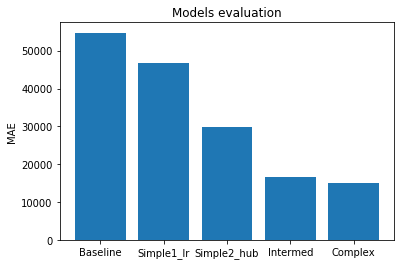

In [48]:
mae_values = [MAE_baseline, simple_mae_lr_te, simple_mae_hub_te2, int_mae_tuned_te, compl_mae_te_tuned]
titles = ['Baseline', 'Simple1_lr', 'Simple2_hub' , 'Intermed', 'Complex']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.title('Models evaluation')
plt.ylabel('MAE')
plt.show()

### PREDICTIONS

In [49]:
#test set 500 houses
test_set = pd.read_csv('house-prices-test.csv')
print('Test set shape', test_set.shape)
test_set.head()

Test set shape (500, 81)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1,837,907126050,20,RL,65.0,9757,Pave,NaN,Reg,Low,...,92,0,NaN,NaN,NaN,0,10,2009,WD,Normal
2,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,10,2006,New,Partial
3,1963,535452060,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
4,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,...,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml


##### Data cleaning

In [50]:
PID = test_set['PID']
PID.shape

(500,)

In [51]:
#delete columns with observation identifiers
test_set.drop(['Order', 'PID'], axis=1, inplace=True)

In [52]:
#check null values
test_set.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage       70
Lot Area            0
Street              0
Alley             465
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        3
Mas Vnr Area        3
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual           9
                 ... 
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Fireplace Qu      236
Garage Type        21
Garage Yr Blt      21
Garage Finish      21
Garage Cars         0
Garage Area         0
Garage Qual        21
Garage Con

In [53]:
test_set.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [54]:
test_set[['Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath']].isnull().sum()

Foundation         0
Bsmt Qual          9
Bsmt Cond          9
Bsmt Exposure      9
BsmtFin Type 1     9
BsmtFin SF 1       0
BsmtFin Type 2     9
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
dtype: int64

In [55]:
#Select numerical data
test_num_data = test_set.select_dtypes(exclude=[object])
print(test_num_data.shape)
print(test_num_data.columns)
test_num_data.head()


(500, 36)
Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,50,NaN,11275,6,7,1932,1950,480.0,297.0,557.0,...,432.0,0,0,19,0,0,0,0,3,2007
1,20,65.0,9757,5,7,1994,1994,0.0,755.0,0.0,...,440.0,66,0,0,0,92,0,0,10,2009
2,60,86.0,11065,8,5,2006,2006,788.0,0.0,0.0,...,753.0,177,74,0,0,0,0,0,10,2006
3,20,70.0,7000,5,7,1960,2002,45.0,588.0,0.0,...,254.0,0,16,0,0,0,0,0,4,2007
4,50,66.0,8712,4,7,1900,1950,0.0,0.0,0.0,...,384.0,68,0,98,0,0,0,0,1,2010


In [56]:
#Replace missing values in column 'Lot Frontage', which is a continous variable, with a mean
test_set['Lot Frontage'].fillna(value=test_set['Lot Frontage'].mean(),inplace=True)

#Replace missing values in column 'Alley' with value 'No' which denotes 'No alley access'
test_set['Alley'].fillna(value="No", inplace=True)
test_set['Alley'].replace({'No': 0, 'Grvl': 1, 'Pave':2}, inplace=True)

#Replace missing values in column 'Mas Vnr Type' with value 'No' which denotes 'None'
test_set['Mas Vnr Type'].fillna(value="None", inplace=True)
test_set['Mas Vnr Type'].replace({'None': 0, 'BrkCmn': 1, 'BrkFace':2, 'CBlock':3, 'Stone':4}, inplace=True)

#Replace missing values in column 'Mas Vnr Area', which is a continous variable, with a mean
test_set['Mas Vnr Area'].fillna(value=data_df['Mas Vnr Area'].mean(), inplace=True)

#In the following columns replace missing values with value No which denotes 'No basement', and replace with integer scale
test_set['Bsmt Qual'].fillna(value='No', inplace=True)
test_set['Bsmt Qual'].replace({'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

test_set['Bsmt Cond'].fillna(value='No', inplace=True)
test_set['Bsmt Cond'].replace({'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)

test_set['Bsmt Exposure'].fillna(value ='NoB', inplace=True)
test_set['Bsmt Exposure'].replace({'NoB': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},inplace=True)

test_set['BsmtFin Type 1'].fillna(value='No', inplace=True)
test_set['BsmtFin Type 1'].replace({'No': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},inplace=True)

test_set['BsmtFin Type 2'].fillna(value='No', inplace=True)
test_set['BsmtFin Type 2'].replace({'No': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},inplace=True)

# For the following columns replaced missing values with value No which denotes 'No fireplace/Garage', 
# and replace with integer scale
test_set['Fireplace Qu'].fillna(value = 'No', inplace=True)
test_set['Fireplace Qu'].replace({'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)

test_set['Garage Type'].fillna(value='No', inplace=True)
test_set['Garage Type'].replace({'No': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6},inplace=True)


#Replace with median 
test_set['No Garage'] = test_set['Garage Yr Blt'].isnull().astype(int)
test_set['Garage Yr Blt'].fillna(test_set['Garage Yr Blt'].median(), inplace =True)



# Replaced missing values with value No which denotes 'No Garage', 
# and replace with integer scale
test_set['Garage Finish'].fillna(value='No', inplace=True)
test_set['Garage Finish'].replace({'No': 0, 'Unf':1, 'RFn': 2, 'Fin':3}, inplace=True)

# if do for two variables at once gives a warning, see in the cell below
test_set['Garage Qual'].fillna(value='No', inplace=True)
test_set['Garage Qual'].replace({'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

test_set['Garage Cond'].fillna(value='No', inplace=True)
test_set['Garage Cond'].replace({'No': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)


# For the following columns replaced missing values with value No which denotes 'No Pool/Fence/Misc features', 
# and replace with integer scale

test_set['Pool QC'].fillna(value='No', inplace =True)
test_set['Pool QC'].replace({'No': 0, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},inplace=True)

test_set['Fence'].fillna(value='No', inplace=True)
test_set['Fence'].replace({'No': 0, 'MnWw': 1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}, inplace=True)

test_set['Misc Feature'].fillna(value='No', inplace=True)
test_set['Misc Feature'].replace({'No':0, 'TenC':1, 'Shed':2, 'Othr':3, 'Gar2': 4, 'Elev':5},inplace=True)

print('Null vales in test set:', test_set.isnull().sum().sum())
print('Test set shape:', test_set.shape)

Null vales in test set: 0
Test set shape: (500, 80)


In [57]:
#check numerical columns
test_num_data1 = test_set.select_dtypes(exclude=[object])
print(test_num_data1.shape)
test_num_data1.head()

(500, 52)


,MS SubClass,Lot Frontage,Lot Area,Alley,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,No Garage
0,50,69.330233,11275,0,6,7,1932,1950,2,480.0,...,0,0,0,0,0,0,0,3,2007,0
1,20,65.000000,9757,0,5,7,1994,1994,0,0.0,...,0,92,0,0,0,0,0,10,2009,0
2,60,86.000000,11065,0,8,5,2006,2006,4,788.0,...,0,0,0,0,0,0,0,10,2006,0
3,20,70.000000,7000,0,5,7,1960,2002,2,45.0,...,0,0,0,0,1,0,0,4,2007,0
4,50,66.000000,8712,2,4,7,1900,1950,0,0.0,...,0,0,0,0,0,0,0,1,2010,0


##### Encoding Feature engineering

In [58]:
#Define numerical encoding to Ordinal variables

test_set['Lot Shape'].replace({'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}, inplace=True)
test_set['Utilities'].replace({'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}, inplace=True)
test_set['Land Slope'].replace({'Sev': 1, 'Mod': 2, 'Gtl': 3}, inplace = True)
test_set['Exter Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
test_set['Exter Cond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
test_set['Heating QC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
test_set['Kitchen Qual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
test_set['Functional'].replace({'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}, inplace=True)
test_set['Paved Drive'].replace({'N': 0, 'P': 1, 'Y': 2}, inplace=True)

In [59]:
#'Year Built','Year Remod/Add', 'Garage Yr Blt' features

print(test_set['Year Built'].min(), test_set['Year Built'].max())
print(test_set['Year Remod/Add'].min(), test_set['Year Remod/Add'].max())
print(test_set['Garage Yr Blt'].min(), test_set['Garage Yr Blt'].max())

#create 10 bins and encode them from 0 (old) and 9 (new). Period from 1872 to 2010
test_set['House Modernity'] = pd.qcut(test_set['Year Built'], q=10).cat.codes

#create 6 bins and encode them from 0 (long time ago) and 5 (recently). Period from 1950 to 2010 
test_set['House Remod/Add Modernity'] = pd.qcut(test_set['Year Remod/Add'], q=5).cat.codes

#create 10 bins and encode them from 0 (old) and 9 (new). Period from 1872 to 2010
test_set['Garage Modernity'] = pd.qcut(test_set['Garage Yr Blt'], q=10).cat.codes

test_set.shape

1872 2010
1950 2010
1895.0 2010.0


(500, 83)

In [60]:
#remove features which are linear combinations of various variables ('Total Bsmt SF', 'Gr Liv Area')
#and original features  ('Garage Yr Blt', 'Year Built', 'Year Remod/Add')

test_set = test_set.drop(['Garage Yr Blt', 'Year Built', 'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area'], axis=1)
test_set.shape



(500, 78)

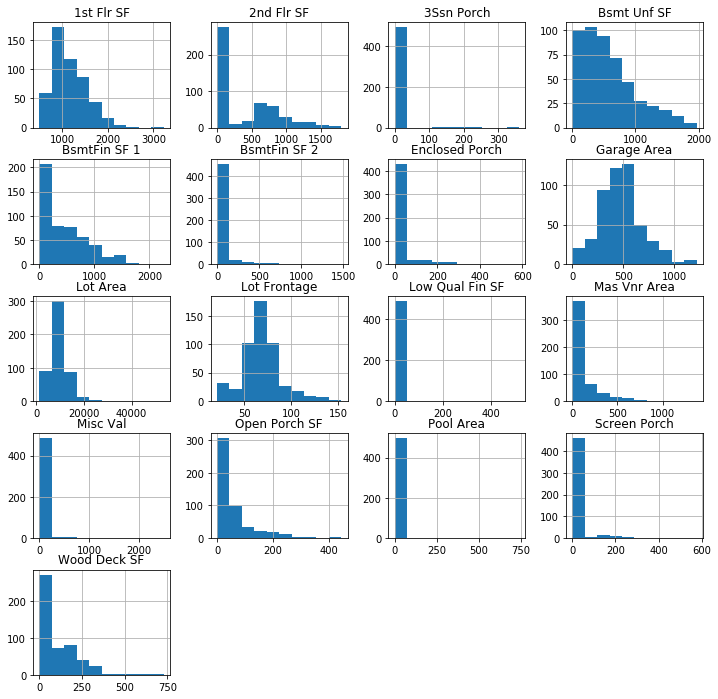

In [61]:
#select continious variables

contin_features = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',  
        'BsmtFin SF 2', 'Bsmt Unf SF',  '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF',   'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val']

#plot them to see how they are distributed
test_set[contin_features].hist(figsize= (12,12))
plt.show()

#we can see that mostly of them are with skewed distributions


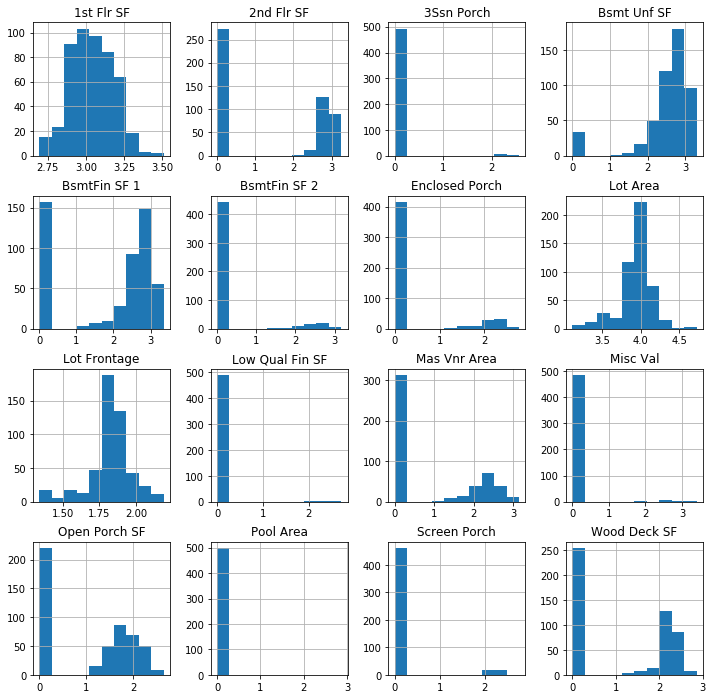

In [62]:
#Apply logarithm transformation to all of them except 'Garage Area' variable which is not skewed and looks like more normally distributed

contin_features2 = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 
       'BsmtFin SF 1',  'BsmtFin SF 2', 'Bsmt Unf SF',  '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF',  'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val']

test_set[contin_features2] = np.log10(test_set[contin_features2]+1)

test_set[contin_features2].hist(figsize= (12,12))
plt.show()

In [63]:
#Add polynomial features

# add polynomial feature for 'Garage Area' variable

# Scaling 
test_set['Garage Area'] = (test_set['Garage Area'] - test_set['Garage Area'].min()) / (test_set['Garage Area'].max() - test_set['Garage Area'].min())

# Add polynomial features 
test_set['Garage Area**2'] = test_set['Garage Area']**2


test_set[['Garage Area', 'Garage Area**2']].head()


,Garage Area,Garage Area**2
0,0.354098,0.125386
1,0.360656,0.130073
2,0.617213,0.380952
3,0.208197,0.043346
4,0.314754,0.099070


In [64]:
test_set.shape

(500, 79)

In [65]:
test_set.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck 

In [66]:
encoded_test_set = pd.get_dummies(test_set, columns=['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 
 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
'Mas Vnr Type','Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition', 'No Garage', 
'Garage Modernity', 'House Modernity', 'House Remod/Add Modernity',
                                           
'Lot Shape', 'Utilities',  'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual',
  'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 
  'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
                                          
    'Mo Sold', 'Yr Sold']) 

encoded_test_set.head()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,...,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Yr Sold_2006,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
0,1.847142,4.052155,2.682145,2.474216,2.746634,0.000000,3.040207,2.952308,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,1.819544,3.989361,0.000000,2.878522,0.000000,2.372912,2.996074,0.000000,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0
2,1.939519,4.043991,2.897077,0.000000,0.000000,3.035830,3.049606,2.929930,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
3,1.851258,3.845160,1.662758,2.770115,0.000000,2.626340,3.054996,0.000000,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,1.826075,3.940168,0.000000,0.000000,0.000000,2.934498,2.934498,2.505150,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
new_encoded_test_set = encoded_test_set.reindex(columns = encoded_compl_df.columns, fill_value=0)
new_encoded_test_set.head()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,...,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Yr Sold_2006,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
0,1.847142,4.052155,2.682145,2.474216,2.746634,0.000000,3.040207,2.952308,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,1.819544,3.989361,0.000000,2.878522,0.000000,2.372912,2.996074,0.000000,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0
2,1.939519,4.043991,2.897077,0.000000,0.000000,3.035830,3.049606,2.929930,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
3,1.851258,3.845160,1.662758,2.770115,0.000000,2.626340,3.054996,0.000000,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,1.826075,3.940168,0.000000,0.000000,0.000000,2.934498,2.934498,2.505150,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
X_test = new_encoded_test_set.drop(['LogSalePrice'], axis=1).values
predictions = 10**ridge2_c.predict(X_test)

In [69]:
predictions_df = pd.DataFrame.from_items([
    ('PID', PID),
    ('SalePrice', predictions)
])

C:\Users\User1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
predictions_df.head()

,PID,SalePrice
0,909279080,194070.531866
1,907126050,154954.383964
2,528144030,314686.300159
3,535452060,115827.797151
4,911202100,102865.756963


In [71]:
predictions_df.SalePrice.describe()

count       500.000000
mean     188817.969836
std       83690.118707
min       51965.747499
25%      133214.047959
50%      166524.847632
75%      221521.699644
max      601063.860310
Name: SalePrice, dtype: float64

In [72]:
input_data = pd.read_csv('house-prices.csv')
input_data.SalePrice.describe() 

count      2430.000000
mean     180199.692593
std       79607.467171
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      213099.750000
max      755000.000000
Name: SalePrice, dtype: float64

In [73]:
predictions_df.to_csv('house-price-pred.csv', index=False, float_format='%.0f')